In [62]:
from dataset import Dataset
from classificadores import PerceptronSimples, MultiLayerPerceptron, ExtremeLearningMachine

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import clear_output

from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.patches import Rectangle

In [10]:
# Conjunto de dados Câncer de Mama =================================================
colunas = ["ID", "Diagnosis", "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1", "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2", "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"]

dataset = Dataset.from_file( 
    filepath = r"datasets\wdbc.data", 
    label_column = 1,
    delimiter = ",",  
    column_names = colunas
).ensure_numeric_labels().remove_features(["ID"]).normalize()

dataset.vectorize_labels()

print(dataset)

Dataset(instâncias=569, features=30, classes=2)


In [11]:
# Conjunto de dados Coluna Vertebral =================================================
colunas = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", "degree spondylolisthesis", "class"]

dataset = Dataset.from_file( 
    filepath = r"datasets\column_3C.dat", 
    label_column = -1,
    delimiter = " ",  
    column_names = colunas
).ensure_numeric_labels().normalize()

dataset.vectorize_labels()

print(dataset)

Dataset(instâncias=310, features=6, classes=3)


In [20]:
# Dicionários para armazenar as acurácias
acuracia_teste = {
    "PS": [], "MLP": [], "ELM": []
}

acuracia_treinamento = {
    "PS": [], "MLP": [], "ELM": []
}

# Matrizes de confusão
matriz_confusão_treinamento = {
    "PS":  np.zeros( shape = (dataset.class_count, dataset.class_count) ), 
    "MLP": np.zeros( shape = (dataset.class_count, dataset.class_count) ), 
    "ELM": np.zeros( shape = (dataset.class_count, dataset.class_count) )
}

matriz_confusão_teste = {
    "PS":  np.zeros( shape = (dataset.class_count, dataset.class_count) ), 
    "MLP": np.zeros( shape = (dataset.class_count, dataset.class_count) ), 
    "ELM": np.zeros( shape = (dataset.class_count, dataset.class_count) )
}

# Percorre as rodada independentes
nRodadas = 50

for rodada in range( nRodadas ):
    print(f"\n==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== {rodada+1}/{nRodadas}")

    # Para cada rodada independente, realiza o shuffle e separa o conjunto de dados
    shuffled_dataset = dataset.shuffle()
    train_dataset, test_dataset = shuffled_dataset.split()

    # Cria instâncias para os classificadores
    PS = PerceptronSimples( train_dataset )
    MLP = MultiLayerPerceptron( train_dataset, q = 10 )
    ELM = ExtremeLearningMachine( train_dataset, q = 300 )

    # Treina cada uma das redes
    print("Treinando o PS:")
    PS.train( max_epocas = 300, eta = 0.0001 )

    print("\nTreinando o MLP:")
    MLP.train( max_epocas = 500, eta = 0.001 )

    print("\nTreinando o ELM")
    ELM.train()

    # Reseta os erros da rodada
    erros_treinamento = {
        "PS": 0, "MLP": 0, "ELM": 0
    }

    erros_teste = {
        "PS": 0, "MLP": 0, "ELM": 0
    }    

    #  Percorre o conjunto de treinamento e computa os erros
    for index, *features, classe_correta in train_dataset:
        classe_predita = PS.predict( features )
        if classe_predita != classe_correta:
            erros_treinamento["PS"] += 1
        
        matriz_confusão_treinamento["PS"][int(classe_predita)][int(classe_correta)] += 1

        classe_predita = MLP.predict( features )
        if classe_predita != classe_correta:
            erros_treinamento["MLP"] += 1

        matriz_confusão_treinamento["MLP"][int(classe_predita)][int(classe_correta)] += 1

        classe_predita = ELM.predict( features )
        if classe_predita != classe_correta:
            erros_treinamento["ELM"] += 1

        matriz_confusão_treinamento["ELM"][int(classe_predita)][int(classe_correta)] += 1

    # Percorre o conjunto de teste e computa os erros
    for index, *features, classe_correta in test_dataset:
        classe_predita = PS.predict( features )
        if classe_predita != classe_correta:
            erros_teste["PS"] += 1

        matriz_confusão_teste["PS"][int(classe_predita)][int(classe_correta)] += 1

        classe_predita = MLP.predict( features )
        if classe_predita != classe_correta:
            erros_teste["MLP"] += 1
        
        matriz_confusão_teste["MLP"][int(classe_predita)][int(classe_correta)] += 1

        classe_predita = ELM.predict( features )
        if classe_predita != classe_correta:
            erros_teste["ELM"] += 1
        
        matriz_confusão_teste["ELM"][int(classe_predita)][int(classe_correta)] += 1
    
    # Armazena a acurácia da rodada
    for classificador in ["PS", "MLP", "ELM"]:
        acuracia_treinamento[classificador].append(
            1 - erros_treinamento[classificador] / len(train_dataset)
        )

        acuracia_teste[classificador].append(
            1 - erros_teste[classificador] / len(test_dataset)
        )

    if rodada%5 == 0:
        clear_output( wait=False )


==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 47/50
Treinando o PS:
Treinamento encerrado após 300 épocas. Custo = 1.253645946210703.

Treinando o MLP:
Treinamento encerrado após 500 épocas. Custo = 0.6182100433277851.

Treinando o ELM
Treinamento encerrado. Custo = 0.0203241887604678

==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 48/50
Treinando o PS:
Treinamento encerrado após 300 épocas. Custo = 1.3985374504330588.

Treinando o MLP:
Treinamento encerrado após 500 épocas. Custo = 0.5868669821774243.

Treinando o ELM
Treinamento encerrado. Custo = 0.01778025878562635

==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 49/50
Treinando o PS:
Treinamento encerrado após 300 épocas. Custo = 1.4306516640879539.

Treinando o MLP:
Treinamento encerrado após 500 épocas. Custo = 0.6229124199660134.

Treinando o ELM
Treinamento encerrado. Custo = 0.02225543464859795

==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 50/50
Treinando o PS:
Treinamento encerrado após 300

In [21]:
print("Treinamento: ")
for classificador in ["PS", "MLP", "ELM"]:
    média = np.mean( acuracia_treinamento[classificador] )
    desvio = np.std( acuracia_treinamento[classificador], ddof=0 )

    print(f"{classificador}: {média*100:.2f}%±{desvio*100:.2f}%")

print("\nTeste:")
for classificador in ["PS", "MLP", "ELM"]:
    média = np.mean( acuracia_teste[classificador] )
    desvio = np.std( acuracia_teste[classificador], ddof=0 )

    print(f"{classificador}: {média*100:.2f}%±{desvio*100:.2f}%")


Treinamento: 
PS: 72.56%±6.46%
MLP: 81.23%±1.14%
ELM: 99.77%±0.27%

Teste:
PS: 70.61%±8.05%
MLP: 80.32%±4.12%
ELM: 39.74%±7.25%


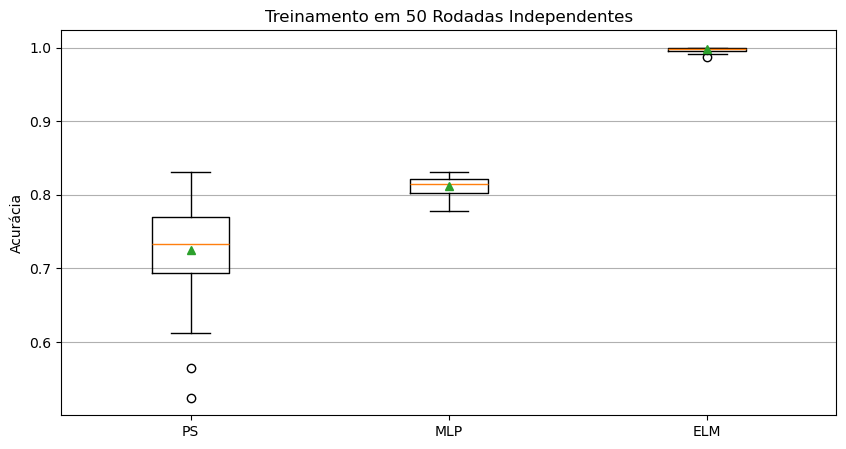

In [22]:
# Exemplo para um boxplot de acurácia em treino
plt.figure(figsize=(10, 5))

# Cada entrada é uma lista com 50 valores de acurácia
dados_treino = [
    acuracia_treinamento["PS"],
    acuracia_treinamento["MLP"],
    acuracia_treinamento["ELM"]
]

plt.boxplot(dados_treino, tick_labels=["PS", "MLP", "ELM"], showmeans=True)
plt.ylabel("Acurácia")
plt.title("Treinamento em 50 Rodadas Independentes")
plt.grid(axis='y')
plt.show()

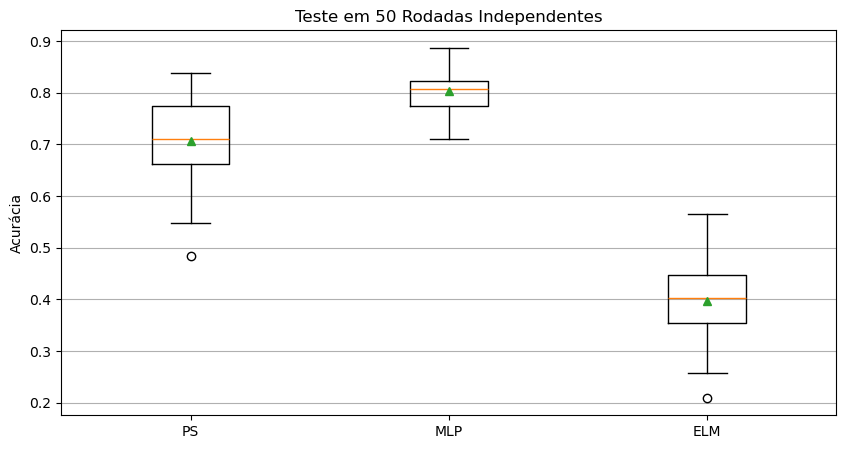

In [23]:
# Exemplo para um boxplot de acurácia em treino
plt.figure(figsize=(10, 5))

# Cada entrada é uma lista com 50 valores de acurácia
dados_teste = [
    acuracia_teste["PS"],
    acuracia_teste["MLP"],
    acuracia_teste["ELM"]
]

plt.boxplot(dados_teste, tick_labels=["PS", "MLP", "ELM"], showmeans=True)
plt.ylabel("Acurácia")
plt.title("Teste em 50 Rodadas Independentes")
plt.grid(axis='y')
plt.show()

In [78]:
def plot_confusion( matriz_confusão, labels = None, title = "", *, ax = None ):
    confusion = ConfusionMatrixDisplay( 
        matriz_confusão, 
        display_labels = labels 
    )

    confusion.plot(
        colorbar=False,                 # Remove a barra de cores
        values_format=".0f",            # Mostra valores inteiros (sem notação científica),
        text_kw={'color': 'black'},      # Define a cor do texto
        ax = ax
    )

    # Remove os blocos coloridos
    for im in confusion.ax_.get_images():
        im.set_visible(False)

    # Cria uma borda usando retângulos
    for i in range( matriz_confusão.shape[0] ):
        for j in range( matriz_confusão.shape[1] ):
            confusion.ax_.add_patch(
                Rectangle( (j - 0.5, i-0.5), 1, 1, fill=False, edgecolor="black", linewidth=1 )
            )

    # Coloca os labels do eixo X para cima
    confusion.ax_.xaxis.set_ticks_position("top")
    confusion.ax_.xaxis.set_label_position("top")

    # Define o rótulo para os eixos
    confusion.ax_.set_xlabel("Classe Real", labelpad=15)
    confusion.ax_.set_ylabel("Classe Predita", labelpad=15)

    # Seta o título
    ax.set_title( title, pad=15 )


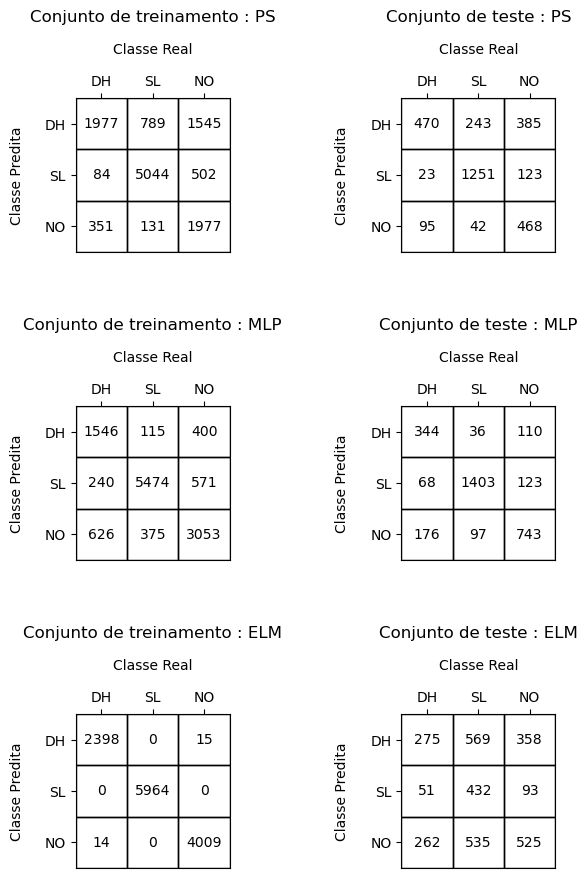

In [95]:
fig, axs = plt.subplots(3, 2, figsize=(7,10))
plt.subplots_adjust(wspace=0.5, hspace=1)

for index, classificador in enumerate(["PS", "MLP", "ELM"]):
    plot_confusion( 
        matriz_confusão_treinamento[classificador], 
        dataset._label_index_to_name.values(),
        f"Conjunto de treinamento : {classificador}",
        ax = axs[index][0]
    )

    plot_confusion( 
        matriz_confusão_teste[classificador], 
        dataset._label_index_to_name.values(),
        f"Conjunto de teste : {classificador}",
        ax = axs[index][1]
    )